# Decision Tree from scratch

## Example

In the following code, we have loaded a dataset containing information for two weeks, indicating whether a game was played or not. The dataset includes four different features (conditions): outlook, temperature, humidity, and wind. The last column, which is a boolean, shows whether a game was played.

In [9]:
#numpy and pandas initialization
import numpy as np
import pandas as pd
#Loading the PlayTennis data
PlayTennis = pd.read_csv("./files/PlayTennis.csv")
PlayTennis.index= list(range(1,PlayTennis.shape[0]+1))
PlayTennis

,outlook,temp,humidity,windy,play
1,sunny,hot,high,False,no
2,sunny,hot,high,True,no
3,overcast,hot,high,False,yes
4,rainy,mild,high,False,yes
5,rainy,cool,normal,False,yes
6,rainy,cool,normal,True,no
7,overcast,cool,normal,True,yes
8,sunny,mild,high,False,no
9,sunny,cool,normal,False,yes
10,rainy,mild,normal,False,yes


For such a dataset, a decision tree could look like this:

<img src='./files/decision-tree-tennis2.svg' style="background-color: white" />

## DT learning algorithms

Decision tree learning algorithms are methods used to create decision trees, which are models for making decisions based on data

- Hunt
- ID3 (Iterative Dichotomister 3)
- C4.5
- CART (Classification And Regression Tree)

### Hunt's Algorithm
Hunt's algorithm is one of the earliest methods for constructing decision trees. It forms the basis for many other decision tree algorithms. The process involves recursively partitioning the data set into subsets based on the most significant attribute until each subset contains instances of a single class or meets a stopping criterion.

### ID3 (Iterative Dichotomiser 3)
ID3, developed by Ross Quinlan, is a popular algorithm for creating decision trees. It uses a top-down, greedy approach to select the attribute that maximizes information gain (a measure based on entropy) at each node. The process continues recursively until all data is classified or no further information gain can be achieved.

### C4.5
C4.5 is an extension of the ID3 algorithm, also developed by Ross Quinlan. It improves upon ID3 by handling both continuous and discrete attributes, dealing with missing values, and pruning trees to avoid overfitting. C4.5 uses gain ratio instead of information gain to select the best attribute, which helps to mitigate the bias towards attributes with many values.

### CART (Classification and Regression Trees)
CART, developed by Breiman et al., is another widely used decision tree algorithm. Unlike ID3 and C4.5, which are primarily used for classification, CART can handle both classification and regression tasks. It uses the Gini impurity or mean squared error (for regression) to split the data at each node. CART also includes a pruning step to simplify the tree and improve its generalization ability.

These algorithms are fundamental in machine learning and data mining, providing a clear and interpretable way to model decision-making processes. Do you have a specific application in mind for these algorithms?

## Entropy

To determine which feature should be in the root node, decision tree uses `Entropy`.

### Entropy 

Entropy in a decision tree is a measure of the impurity or disorder within a set of data. It helps determine how a decision tree splits the data at each node to create branches that lead to the most homogeneous subsets possible.

$$
E(S) = - \sum_{i=1}^{c} p_i \log_2(p_i)
$$
where \( S \) is the dataset, \( c \) is the number of classes, and \( p_i \) is the proportion of instances belonging to class \( i \).

example:

For class of red, $p_i = 3/4$ and for class of blue $p_i = 3/4$. therefore entropy is calculate as follow:

$$
E(S) = - (3/4 * \log_2(3/4) + 1/4 * \log_2(1/4)) = 0.81
$$

<div style="text-align: center;">
    <img src='./files/entropy2.svg' style='background-color: white' />
</div>

For class of red, $p_i = 0/4$ and for class of blue $p_i = 4/4$. therefore entropy is calculate as follow:

$$
E(S) = - (0/4 * \log_2(0/4) + 1/4 * \log_2(4/4)) = 0
$$

<div style="text-align: center;">
    <img src='./files/entropy3.svg' style='background-color: white' />
</div>


For class of red, $p_i = 3/4$ and for class of blue $p_i = 3/4$. therefore entropy is calculate as follow:

$$
E(S) = - (2/4 * \log_2(2/4) + 2/4 * \log_2(2/4)) = 1
$$

<div style="text-align: center;">
    <img src='./files/entropy4.svg' style='background-color: white' />
</div>


**The lower the entropy, the purer our data is.**


In the following figure we can see that entropy is a number between zero and one, and it is 1 when number of red data is equal to number of blue data.

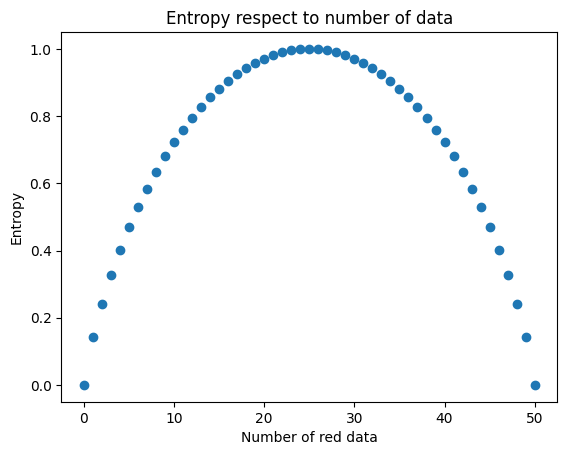

In [43]:
import matplotlib.pyplot as plt

number_of_data = 50
E = []
for i in range(number_of_data+1):
    number_of_red_data = i
    number_of_blue_data = number_of_data - i
    
    pi_red = (number_of_red_data/number_of_data)
    pi_blue = (number_of_blue_data/number_of_data)
    
    E.append(-1*(pi_red*np.log2(pi_red, where=pi_red > 0) + pi_blue*np.log2(pi_blue, where=pi_blue > 0)))
    
plt.scatter(list(range(number_of_data+1)), E)
plt.title("Entropy respect to number of data")
plt.xlabel("Number of red data")
plt.ylabel("Entropy")
plt.show()
    
    

In [44]:
import numpy as np
x = -1*(3/4*np.log2(3/4) + 1/4*np.log2(1/4))
print(x)

0.8112781244591328


## Information Gain:
$$
\text{IG} = E(\text{parent}) - [\text{weighted average}] * E(\text{children})
$$
- where $E$ is called Entropy

In decision trees, information gain is a measure used to determine which feature to split on at each step in the tree-building process. It helps in selecting the attribute that best separates the data into different classes.

Information gain is the reduction in entropy after a dataset is split on an attribute. It is calculated as:

In decision trees, **information gain** is a measure used to determine which feature to split on at each step in the tree-building process. It helps in selecting the attribute that best separates the data into different classes.

### How Information Gain Works

**Information Gain Calculation**:
   - Information gain is the reduction in entropy after a dataset is split on an attribute. It is calculated as:
     $$
     \text{Gain}(S, A) = \text{Entropy}(S) - \sum_{v \in \text{Values}(A)} \frac{|S_v|}{|S|} \text{Entropy}(S_v)
     $$
     where:
     - $ S $ is the original dataset.
     - $ A $ is the attribute being considered for the split.
     - $ S_v $ is the subset of \( S \) for which attribute \( A \) has value \( v \).
     - $\text{Values}(A)$ are the possible values of attribute \( A \).
     - $ |S| $ and $ |S_v| $ are the sizes of the datasets \( S \) and \( S_v \), respectively.


Information gain helps in building more efficient and accurate decision trees by ensuring that each split maximally reduces uncertainty, leading to better classification performance.


### Example

In the following dataset, we want to calculate the information gain of Outlook feature:

In [46]:
PlayTennis

,outlook,temp,humidity,windy,play
1,sunny,hot,high,False,no
2,sunny,hot,high,True,no
3,overcast,hot,high,False,yes
4,rainy,mild,high,False,yes
5,rainy,cool,normal,False,yes
6,rainy,cool,normal,True,no
7,overcast,cool,normal,True,yes
8,sunny,mild,high,False,no
9,sunny,cool,normal,False,yes
10,rainy,mild,normal,False,yes


The information gain for outlook feature is calculated as follow:

$$
G(S,outlook) = E(s) - ( \frac{|S_{rainy}|}{|S|}*E(S_{rainy}) +  \frac{|S_{sunny}|}{|S|}*E(S_{sunny}) + \frac{|S_{overcast}|}{|S|}*E(S_{overcast}) )
$$

In this dataset, we have 5 instances belonging to No class and 9 instances belonging to Yes. Therefore, the general entropy is calculated as follow:

$$
E(S) = - (9/14 * \log_2(9/14) + 5/14 * \log_2(5/14)) = 0.94
$$

For outlook feature, we have three classes: sunny, rainy, overcast.
We have 5 instances When outlook is rainy. Therefore:

$$
\frac{|S_{rainy}|}{|S|} = \frac{5}{14} = 0.36
$$

3 of them belong to Yes and the other 2 belong to No class. Therefore

$$
E(S_{rainy}) = - (3/5 * \log_2(3/5) + 2/5 * \log_2(2/5)) = 0.97
$$

With the same approach:


$$
\frac{|S_{sunny}|}{|S|} = \frac{5}{14} = 0.36
$$
$$
E(S_{sunny}) = - (2/5 * \log_2(2/5) + 3/5 * \log_2(3/5)) = 0.97
$$

$$
\frac{|S_{overcast}|}{|S|} = \frac{4}{14} = 0.29
$$
$$
E(S_{overcast}) = - (4/4 * \log_2(4/4) + 0/4 * \log_2(0/4)) = 0
$$

Therefore:

$$
G(S,outlook) = 0.94 - ( 0.36 * 0.97 +  0.36 * 0.97 - 0.29 * 0 ) = 0.24 
$$


After doing all the calculations for all of the featues, we select the feature with the highest information gain as the root node.

In [48]:
import numpy as np
x = -1*(3/5*np.log2(3/5) + 2/5*np.log2(2/5))
print(x)

0.9709505944546686


## Gini



| Neighbourhood | # of rooms | Affordable (boolean) |
|----------|----------|----------|
| West   | 3 | <span style="color: green;">Yes</span> |
| West   | 5 | <span style="color: green;">Yes</span> |
| West   | 2 | <span style="color: green;">Yes</span> |
| East   | 3 | <span style="color: green;">Yes</span> |
| East   | 4 | <span style="color: green;">Yes</span> |
| East   | 6 | <span style="color: red;">No</span> |
| East   | 5 | <span style="color: red;">No</span> |
| East   | 2 | <span style="color: green;">Yes</span> |

<img src = './files/decision_tree.png'/>

What needs to be decided on?

- Split feature
- Split Point
- When to stop splitting

Steps


- Training:
    - Given the whole dataset:
        - Calculate information gain with each possible split
        - Divide set with that feature and value that gives the most information gain (IG)
        - Divide tree and do the same for all created branches...
        - ... until a stopping criteria is reached

- Testing: 
    - Given a data point:
        - Follow the tree until you reach a leaf node
        - Return the most common class label

## Theory and Terms


### Entropy 

Entropy in a decision tree is a measure of the impurity or disorder within a set of data. It helps determine how a decision tree splits the data at each node to create branches that lead to the most homogeneous subsets possible.

### Key Points about Entropy:
1. **Definition**: Entropy quantifies the amount of uncertainty or impurity in a dataset. In the context of decision trees, it measures how mixed the classes are within a node.
2. **Calculation**: The entropy \( H \) of a dataset is calculated using the formula:
   $$
   E(S) = - \sum_{i=1}^{c} p_i \log_2(p_i)
   $$
   where \( S \) is the dataset, \( c \) is the number of classes, and \( p_i \) is the proportion of instances belonging to class \( i \).

3. **Purpose**: By calculating entropy, a decision tree algorithm can decide the best attribute to split the data. The goal is to choose splits that minimize entropy, leading to more pure (homogeneous) subsets¹².
4. **Information Gain**: When a dataset is split based on an attribute, the change in entropy is called information gain. The attribute with the highest information gain is chosen for the split, as it provides the most significant reduction in uncertainty.

### Stopping criteria

    - maximum depth
    - minimum number of samples
    - min impurity decrease

## Python Implementation

In [10]:
import numpy as np
from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        # check the stopping criteria
        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)


    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # calculate the information gain
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold


    def _information_gain(self, y, X_column, threshold):
        # parent entropy
        parent_entropy = self._entropy(y)

        # create children
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        
        # calculate the weighted avg. entropy of children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        # calculate the IG
        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])


    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)
        



### Dataset

In this example we use the Breast Cancer Wisconsin dataset, which is commonly used for binary classification tasks. Here are some key details:

- **Dataset Characteristics**:
  - **Classes**: 2 (malignant and benign)
  - **Samples per class**: 212 (malignant), 357 (benign)
  - **Total samples**: 569
  - **Dimensionality**: 30 features
  - **Feature types**: Real, positive values
  
- **Return Values**:
  - **data**: The data matrix (569 samples, 30 features).
  - **target**: The classification target (569 samples).
  - **feature_names**: Names of the dataset columns.
  - **target_names**: Names of the target classes.
  - **DESCR**: Full description of the dataset.
  - **filename**: Path to the location of the data file.


This dataset is great for practicing classification algorithms and understanding the basics of machine learning.


In [11]:
from sklearn import datasets
import pandas as pd

bc = datasets.load_breast_cancer()
# columns = bc.columns
X, y = bc.data, bc.target
# df = pd.DataFrame(X)

# Get the column names
column_names = bc.feature_names
label_names = bc.target_names
print(f'Features: {column_names}')
print(f'Target: {label_names}')
# Convert column names to DataFrame
df = pd.DataFrame(X, columns=column_names)
df['target'] = y
df


Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target: ['malignant' 'benign']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234
)


### Run the Algorithm

In [13]:

clf = DecisionTree(max_depth=10)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

def accuracy(y_test, y_pred):
    return np.sum(y_test == y_pred) / len(y_test)

acc = accuracy(y_test, predictions)
print(acc)

0.9210526315789473


Resources:

- https://www.youtube.com/watch?v=NxEHSAfFlK8

Exercise:

Train a decision tree for Iris data set: